# Bills of Mortality Data Exploration

This notebook provides a comprehensive overview of the processed Bills of Mortality data, including basic statistics, data structure, and initial insights.

## Dataset Overview

The Bills of Mortality dataset contains historical records of deaths in London parishes, processed into a normalized PostgreSQL-ready format.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')

# Data directory
DATA_DIR = Path('../data')

print("📊 Bills of Mortality Data Exploration")
print("="*50)

📊 Bills of Mortality Data Exploration


## Load All Datasets

In [2]:
# Load all datasets
datasets = {}
file_info = {}

data_files = {
    'parishes': 'parishes.csv',
    'years': 'years.csv', 
    'weeks': 'weeks.csv',
    'bills': 'all_bills.csv'
}

for name, filename in data_files.items():
    filepath = DATA_DIR / filename
    if filepath.exists():
        df = pd.read_csv(filepath)
        datasets[name] = df
        file_info[name] = {
            'rows': len(df),
            'columns': len(df.columns),
            'size_mb': filepath.stat().st_size / (1024 * 1024)
        }
        print(f"✓ Loaded {name}: {len(df):,} records, {len(df.columns)} columns")
    else:
        print(f"✗ File not found: {filepath}")

print(f"\n📁 Total datasets loaded: {len(datasets)}")

✓ Loaded parishes: 156 records, 3 columns
✓ Loaded years: 113 records, 1 columns
✓ Loaded weeks: 5,393 records, 11 columns
✓ Loaded bills: 1,292,566 records, 10 columns

📁 Total datasets loaded: 4


## Dataset Overview Summary

In [9]:
# Create summary table
summary_data = []
for name, info in file_info.items():
    summary_data.append({
        'Dataset': name.title(),
        'Records': f"{info['rows']:,}",
        'Columns': info['columns'],
        'Size (MB)': f"{info['size_mb']:.2f}"
    })

summary_df = pd.DataFrame(summary_data)
print("Dataset Summary")
print("="*40)
print(summary_df.to_string(index=False))

# Total records
total_records = sum(info['rows'] for info in file_info.values())
total_size = sum(info['size_mb'] for info in file_info.values())
print(f"\n📊 Total Records: {total_records:,}")
print(f"Total Size: {total_size:.2f} MB")

# Table
print("\nTable")
print("="*40)
display(datasets['bills'].head(10))

Dataset Summary
 Dataset   Records  Columns Size (MB)
Parishes       156        3      0.01
   Years       113        1      0.00
   Weeks     5,393       11      0.49
   Bills 1,292,566       10    103.87

📊 Total Records: 1,298,228
Total Size: 104.37 MB

Table


,parish_id,count_type,count,year,week_id,bill_type,missing,illegible,source,unique_identifier
0,26,buried,1,1701,1701-1702-14,weekly,False,False,laxton_parishes,Laxton-1701-14-recto
1,1,buried,3,1701,1701-1702-14,weekly,False,False,laxton_parishes,Laxton-1701-14-recto
2,9,buried,1,1701,1701-1702-14,weekly,False,False,laxton_parishes,Laxton-1701-14-recto
3,10,buried,3,1701,1701-1702-14,weekly,False,False,laxton_parishes,Laxton-1701-14-recto
4,4,buried,0,1701,1701-1702-14,weekly,True,False,laxton_parishes,Laxton-1701-14-recto
5,5,buried,0,1701,1701-1702-14,weekly,True,False,laxton_parishes,Laxton-1701-14-recto
6,6,buried,0,1701,1701-1702-14,weekly,True,False,laxton_parishes,Laxton-1701-14-recto
7,7,buried,0,1701,1701-1702-14,weekly,True,False,laxton_parishes,Laxton-1701-14-recto
8,8,buried,1,1701,1701-1702-14,weekly,False,False,laxton_parishes,Laxton-1701-14-recto
9,27,buried,0,1701,1701-1702-14,weekly,True,False,laxton_parishes,Laxton-1701-14-recto


## Bills of Mortality - Core Dataset Analysis

In [10]:
if 'bills' in datasets:
    bills = datasets['bills']
    
    print("📊 Bills of Mortality Dataset Analysis")
    print("="*45)
    print(f"Shape: {bills.shape}")
    print(f"\nColumns: {list(bills.columns)}")
    print(f"\nData types:")
    print(bills.dtypes)
    
    # Basic statistics
    print(f"\n📈 Basic Statistics:")
    print(f"Time range: {bills['year'].min()} - {bills['year'].max()}")
    print(f"Unique parishes: {bills['parish_id'].nunique()}")
    print(f"Unique weeks: {bills['week_id'].nunique()}")
    print(f"Count types: {bills['count_type'].unique()}")
    print(f"Bill types: {bills['bill_type'].unique()}")
    
    # Missing data check
    print(f"\n🔍 Missing Data:")
    missing = bills.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values found")
        
    # Data quality flags
    if 'missing' in bills.columns:
        missing_count = bills['missing'].sum()
        print(f"\n🚩 Records marked as missing: {missing_count:,} ({missing_count/len(bills)*100:.1f}%)")
    
    if 'illegible' in bills.columns:
        illegible_count = bills['illegible'].sum()
        print(f"🚩 Records marked as illegible: {illegible_count:,} ({illegible_count/len(bills)*100:.1f}%)")

📊 Bills of Mortality Dataset Analysis
Shape: (1292566, 10)

Columns: ['parish_id', 'count_type', 'count', 'year', 'week_id', 'bill_type', 'missing', 'illegible', 'source', 'unique_identifier']

Data types:
parish_id             int64
count_type           object
count                 int64
year                  int64
week_id              object
bill_type            object
missing                bool
illegible              bool
source               object
unique_identifier    object
dtype: object

📈 Basic Statistics:
Time range: 1635 - 1752
Unique parishes: 149
Unique weeks: 5005
Count types: ['buried' 'plague']
Bill types: ['weekly' 'general']

🔍 Missing Data:
No missing values found

🚩 Records marked as missing: 847,866 (65.6%)
🚩 Records marked as illegible: 0 (0.0%)


## Count Distribution Analysis

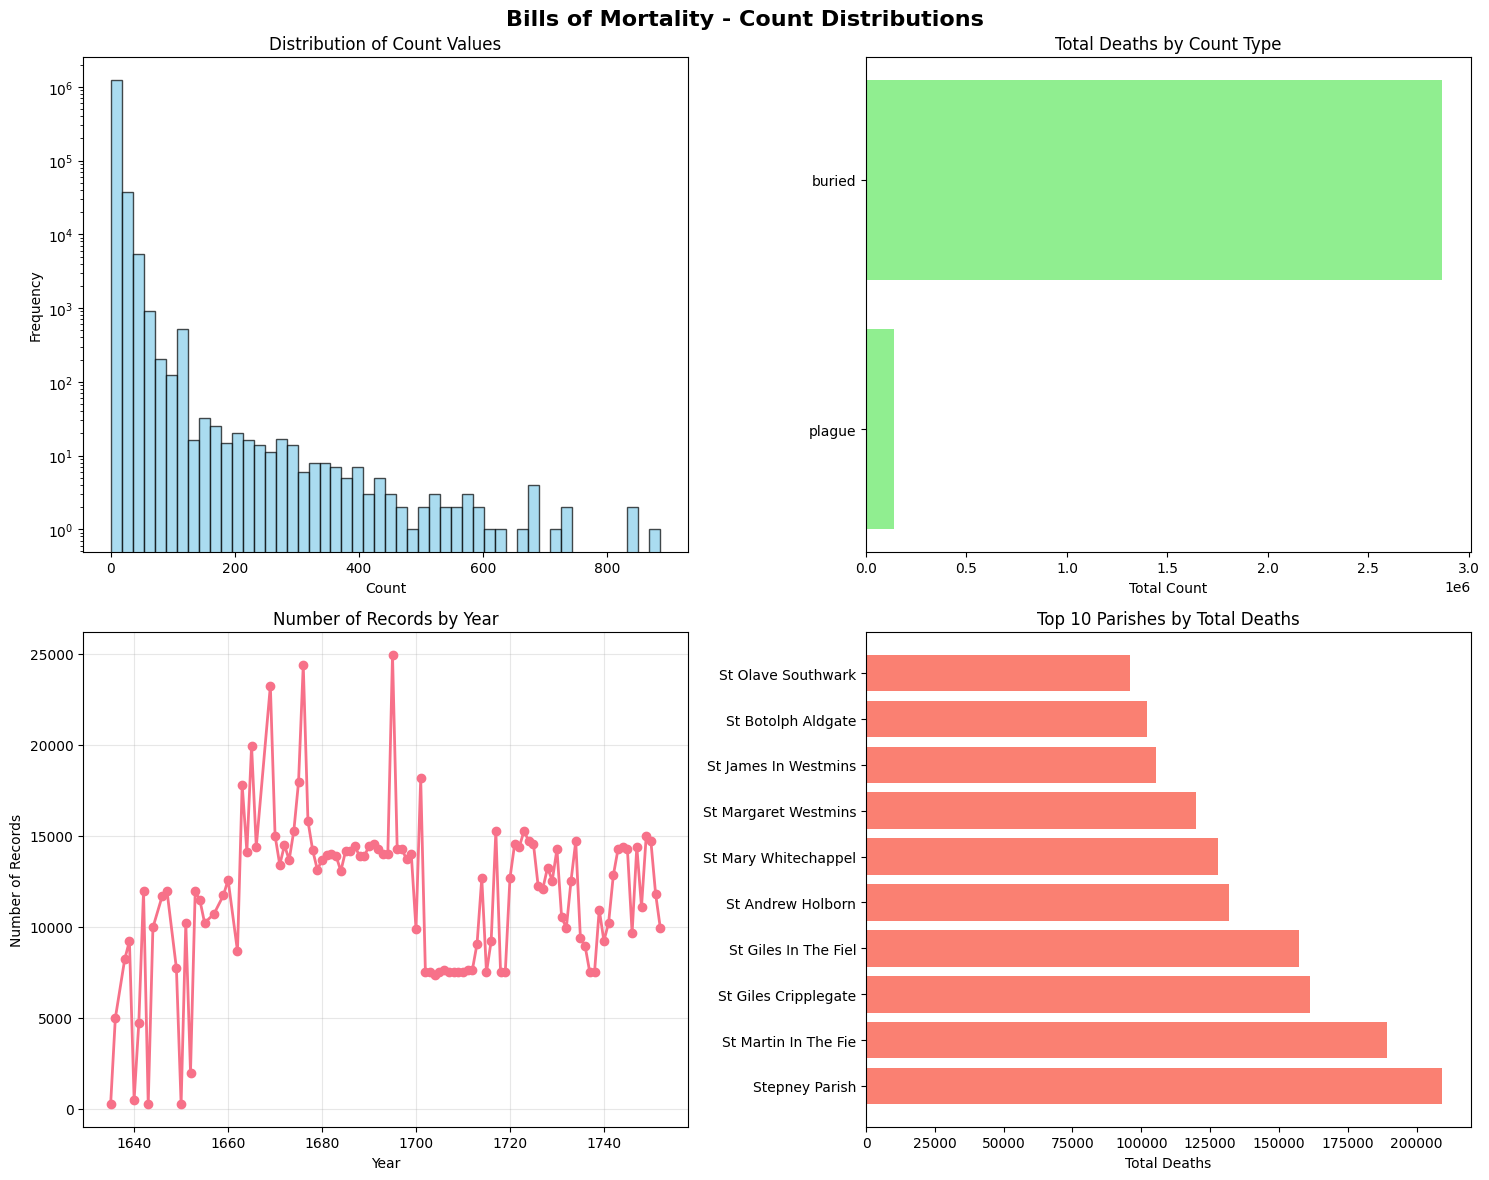


📊 Count Statistics:
Total deaths recorded: 3,003,596
Average deaths per record: 2.32
Median deaths per record: 0.00
Max deaths in single record: 886
Records with zero deaths: 847,963


In [7]:
if 'bills' in datasets:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Bills of Mortality - Count Distributions', fontsize=16, fontweight='bold')
    
    # Count distribution histogram
    axes[0,0].hist(bills['count'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Distribution of Count Values')
    axes[0,0].set_xlabel('Count')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].set_yscale('log')
    
    # Count by type
    count_by_type = bills.groupby('count_type')['count'].sum().sort_values(ascending=True)
    axes[0,1].barh(count_by_type.index, count_by_type.values, color='lightgreen')
    axes[0,1].set_title('Total Deaths by Count Type')
    axes[0,1].set_xlabel('Total Count')
    
    # Records by year
    records_by_year = bills.groupby('year').size()
    axes[1,0].plot(records_by_year.index, records_by_year.values, marker='o', linewidth=2)
    axes[1,0].set_title('Number of Records by Year')
    axes[1,0].set_xlabel('Year')
    axes[1,0].set_ylabel('Number of Records')
    axes[1,0].grid(True, alpha=0.3)
    
    # Top parishes by total deaths
    if 'parishes' in datasets:
        parish_totals = bills.groupby('parish_id')['count'].sum().sort_values(ascending=False).head(10)
        # Map parish IDs to names
        parish_names = datasets['parishes'].set_index('id')['parish_name'].to_dict()
        parish_labels = [parish_names.get(pid, f"Parish {pid}")[:20] for pid in parish_totals.index]
        
        axes[1,1].barh(range(len(parish_totals)), parish_totals.values, color='salmon')
        axes[1,1].set_yticks(range(len(parish_totals)))
        axes[1,1].set_yticklabels(parish_labels)
        axes[1,1].set_title('Top 10 Parishes by Total Deaths')
        axes[1,1].set_xlabel('Total Deaths')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("\n📊 Count Statistics:")
    print(f"Total deaths recorded: {bills['count'].sum():,}")
    print(f"Average deaths per record: {bills['count'].mean():.2f}")
    print(f"Median deaths per record: {bills['count'].median():.2f}")
    print(f"Max deaths in single record: {bills['count'].max():,}")
    print(f"Records with zero deaths: {(bills['count'] == 0).sum():,}")

## Temporal Coverage Analysis

📅 Temporal Coverage Analysis
Year range: 1635 - 1752
Total years: 113
Total weeks: 5393


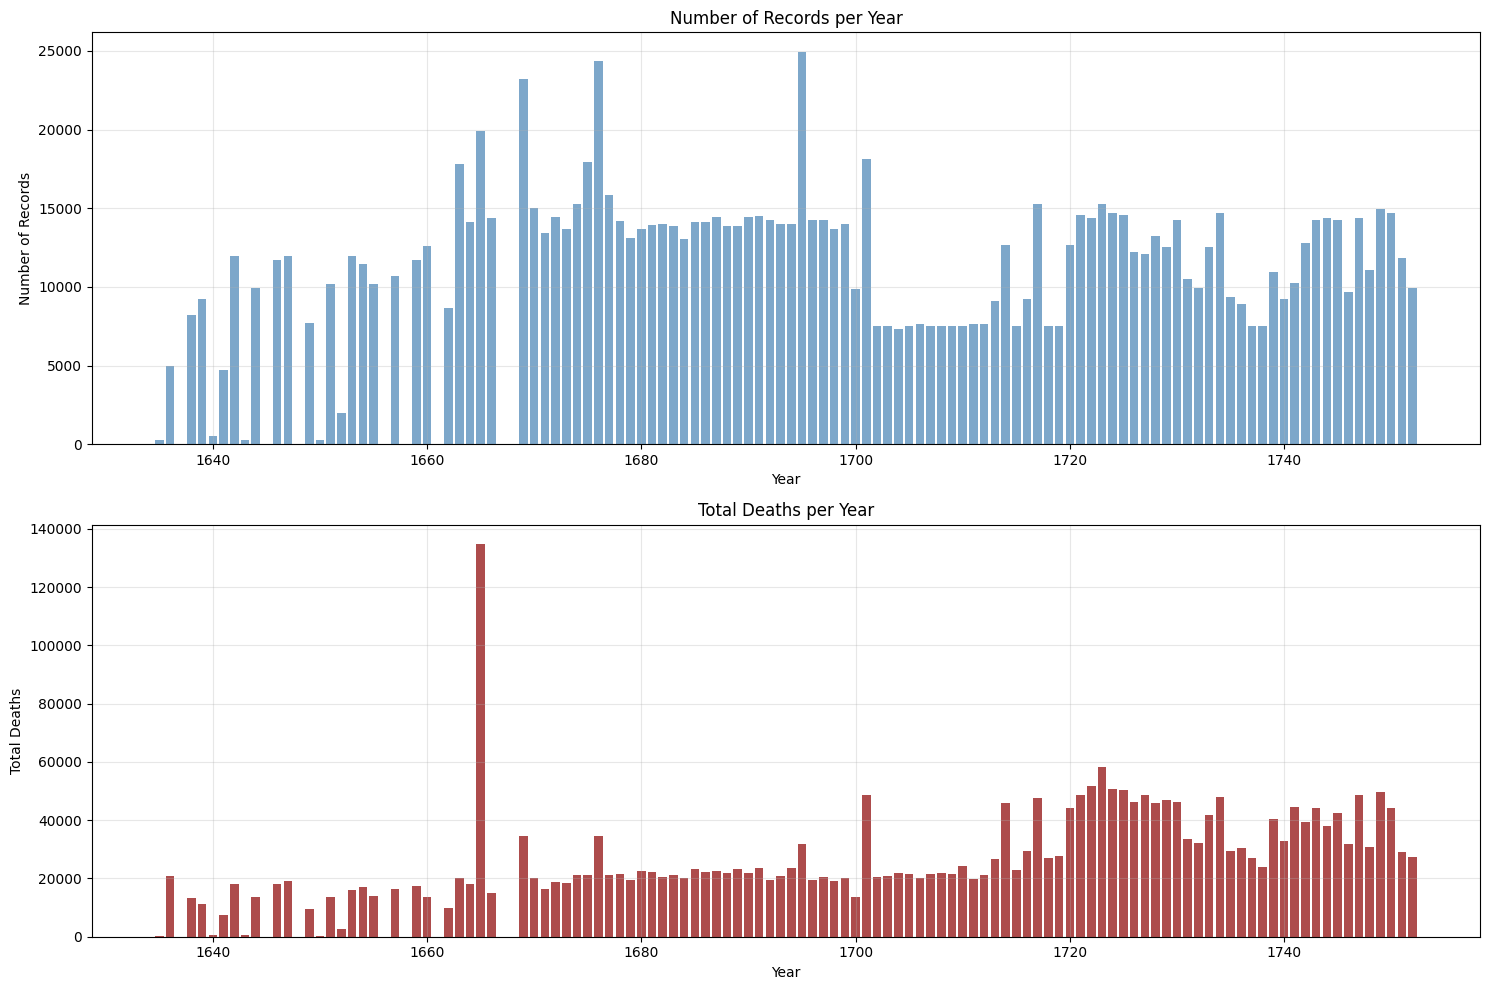


📊 Week Coverage:
Sample week IDs: ['1701-1702-14', '1701-1702-15', '1700-1701-16', '1700-1701-17', '1700-1701-18']


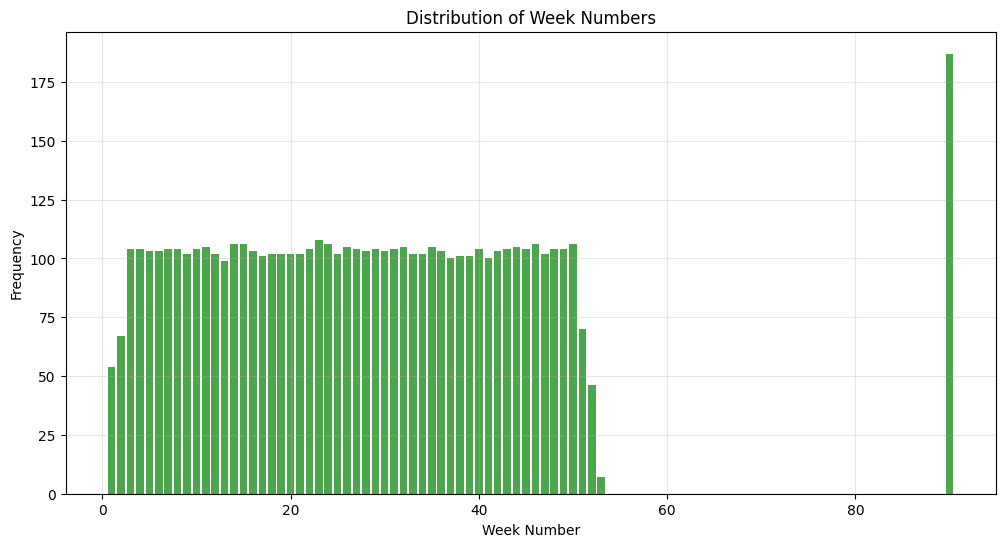

In [9]:
if 'years' in datasets and 'weeks' in datasets:
    years = datasets['years']
    weeks = datasets['weeks']
    
    print("📅 Temporal Coverage Analysis")
    print("="*35)
    print(f"Year range: {years['year'].min()} - {years['year'].max()}")
    print(f"Total years: {len(years)}")
    print(f"Total weeks: {len(weeks)}")
    
    # Year distribution
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    
    # Records per year
    if 'bills' in datasets:
        yearly_counts = bills.groupby('year').size()
        yearly_deaths = bills.groupby('year')['count'].sum()
        
        axes[0].bar(yearly_counts.index, yearly_counts.values, alpha=0.7, color='steelblue')
        axes[0].set_title('Number of Records per Year')
        axes[0].set_xlabel('Year')
        axes[0].set_ylabel('Number of Records')
        axes[0].grid(True, alpha=0.3)
        
        axes[1].bar(yearly_deaths.index, yearly_deaths.values, alpha=0.7, color='darkred')
        axes[1].set_title('Total Deaths per Year')
        axes[1].set_xlabel('Year')
        axes[1].set_ylabel('Total Deaths')
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Week analysis
    if 'week_id' in weeks.columns:
        print(f"\n📊 Week Coverage:")
        print(f"Sample week IDs: {weeks['week_id'].head().tolist()}")
        
        # Extract week numbers if possible
        if weeks['week_id'].str.contains('-').any():
            week_parts = weeks['week_id'].str.split('-', expand=True)
            if len(week_parts.columns) >= 3:
                week_nums = pd.to_numeric(week_parts.iloc[:, -1], errors='coerce')
                week_distribution = week_nums.value_counts().sort_index()
                
                plt.figure(figsize=(12, 6))
                plt.bar(week_distribution.index, week_distribution.values, alpha=0.7, color='green')
                plt.title('Distribution of Week Numbers')
                plt.xlabel('Week Number')
                plt.ylabel('Frequency')
                plt.grid(True, alpha=0.3)
                plt.show()

## Data Quality Assessment

In [10]:
print("🔍 Data Quality Assessment")
print("="*30)

# Check for data consistency across tables
quality_issues = []

if 'bills' in datasets and 'parishes' in datasets:
    # Check parish ID consistency
    bill_parishes = set(bills['parish_id'].unique())
    parish_ids = set(parishes['id'].unique())
    
    missing_parishes = bill_parishes - parish_ids
    unused_parishes = parish_ids - bill_parishes
    
    print(f"\n🏛️ Parish ID Consistency:")
    print(f"  Bills reference {len(bill_parishes)} unique parishes")
    print(f"  Parish table has {len(parish_ids)} parishes")
    print(f"  Missing parish definitions: {len(missing_parishes)}")
    print(f"  Unused parish definitions: {len(unused_parishes)}")
    
    if missing_parishes:
        quality_issues.append(f"Missing parish definitions: {list(missing_parishes)[:5]}")

if 'bills' in datasets and 'years' in datasets:
    # Check year consistency
    bill_years = set(bills['year'].unique())
    year_ids = set(years['year'].unique())
    
    missing_years = bill_years - year_ids
    unused_years = year_ids - bill_years
    
    print(f"\n📅 Year Consistency:")
    print(f"  Bills span {len(bill_years)} unique years")
    print(f"  Year table has {len(year_ids)} years")
    print(f"  Missing year definitions: {len(missing_years)}")
    print(f"  Unused year definitions: {len(unused_years)}")
    
    if missing_years:
        quality_issues.append(f"Missing year definitions: {list(missing_years)[:5]}")

if 'bills' in datasets:
    # Check for potential data anomalies
    print(f"\n⚠️ Potential Anomalies:")
    
    # Very high death counts
    high_counts = bills[bills['count'] > bills['count'].quantile(0.99)]
    print(f"  Records with very high death counts (>99th percentile): {len(high_counts)}")
    
    if len(high_counts) > 0:
        print(f"  Highest count: {bills['count'].max()} deaths")
        if 'parishes' in datasets:
            parish_map = parishes.set_index('id')['parish_name'].to_dict()
            top_record = bills.loc[bills['count'].idxmax()]
            parish_name = parish_map.get(top_record['parish_id'], f"Parish {top_record['parish_id']}")
            print(f"    Parish: {parish_name}")
            print(f"    Year: {top_record['year']}, Week: {top_record['week_id']}")
    
    # Check for duplicate records
    key_columns = ['parish_id', 'year', 'week_id', 'count_type']
    if all(col in bills.columns for col in key_columns):
        duplicates = bills.duplicated(subset=key_columns, keep=False)
        print(f"  Potential duplicate records: {duplicates.sum()}")
        
        if duplicates.sum() > 0:
            quality_issues.append(f"Found {duplicates.sum()} potential duplicate records")

# Summary of quality issues
print(f"\n📋 Quality Issues Summary:")
if quality_issues:
    for i, issue in enumerate(quality_issues, 1):
        print(f"  {i}. {issue}")
else:
    print("  ✅ No major quality issues detected")

🔍 Data Quality Assessment

🏛️ Parish ID Consistency:
  Bills reference 149 unique parishes
  Parish table has 156 parishes
  Missing parish definitions: 0
  Unused parish definitions: 7

📅 Year Consistency:
  Bills span 110 unique years
  Year table has 113 years
  Missing year definitions: 0
  Unused year definitions: 3

⚠️ Potential Anomalies:
  Records with very high death counts (>99th percentile): 11925
  Highest count: 886 deaths
    Parish: St Giles Cripplegate
    Year: 1665, Week: 1664-1665-34
  Potential duplicate records: 533706

📋 Quality Issues Summary:
  1. Found 533706 potential duplicate records
